# Structure Learning

In [1]:
using TikzPictures
using BayesNets
using PGFPlots

.


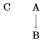

In [2]:
b = DiscreteBayesNet()
push!(b, DiscreteCPD(:A, [0.5,0.5]))
push!(b, DiscreteCPD(:B, [:A], [2], [Categorical([0.5,0.5]), Categorical([0.45,0.55])]))
push!(b, CategoricalCPD(:C, Categorical([0.5,0.5])))

In [3]:
d = rand(b, 5)

5×3 DataFrames.DataFrame
│ Row │ C │ A │ B │
├─────┼───┼───┼───┤
│ 1   │ 1 │ 1 │ 2 │
│ 2   │ 1 │ 2 │ 1 │
│ 3   │ 2 │ 1 │ 1 │
│ 4   │ 1 │ 1 │ 1 │
│ 5   │ 2 │ 2 │ 2 │

In [4]:
count(b, d)

3-element Array{DataFrames.DataFrame,1}:
 2×2 DataFrames.DataFrame
│ Row │ C │ count │
├─────┼───┼───────┤
│ 1   │ 1 │ 3     │
│ 2   │ 2 │ 2     │                                                                
 2×2 DataFrames.DataFrame
│ Row │ A │ count │
├─────┼───┼───────┤
│ 1   │ 1 │ 3     │
│ 2   │ 2 │ 2     │                                                                
 4×3 DataFrames.DataFrame
│ Row │ A │ B │ count │
├─────┼───┼───┼───────┤
│ 1   │ 1 │ 2 │ 1     │
│ 2   │ 2 │ 1 │ 1     │
│ 3   │ 1 │ 1 │ 2     │
│ 4   │ 2 │ 2 │ 1     │

In [5]:
prior = UniformPrior()

.
  likely near U:\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near U:\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near U:\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near U:\.julia\v0.5\IJulia\src\kernel.jl:31


BayesNets.UniformPrior(1.0)

  likely near U:\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near U:\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near U:\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near U:\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near U:\.julia\v0.5\IJulia\src\kernel.jl:31
in show at U:\.julia\v0.5\BayesNets\src\io.jl
  likely near U:\.julia\v0.5\IJulia\src\kernel.jl:31
in show at U:\.julia\v0.5\BayesNets\src\io.jl


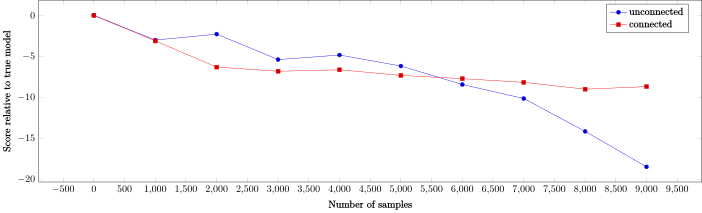

In [6]:
srand(0)

# generate a lot of data
d = rand(b, 10000);

sample_sizes = collect(1:1000:size(d,1))

# unconnected
bUnconnected = fit(DiscreteBayesNet, d, tuple())
scoreUnconnected = Float64[bayesian_score(bUnconnected, d[1:i,:], prior) for i in sample_sizes]

# fully connected
bConnected = fit(DiscreteBayesNet, d, (:A=>:B, :A=>:C, :B=>:C))
scoreConnected = Float64[bayesian_score(bConnected, d[1:i,:], prior) for i in sample_sizes]

# true
scoreTrue = Float64[bayesian_score(b, d[1:i,:], prior) for i in sample_sizes]

# plot
Axis(Plots.Plot[
    Plots.Linear(sample_sizes, scoreUnconnected - scoreTrue, legendentry="unconnected"),
    Plots.Linear(sample_sizes, scoreConnected - scoreTrue, legendentry="connected")
    ], xlabel="Number of samples", ylabel="Score relative to true model", width="25cm", height="8cm")